Accuracy of Decision Tree on winequality-red: 0.7375
Cross-validation scores: [0.5875     0.58125    0.68125    0.68125    0.60188088]
Average cross-validation score: 0.6266261755485893


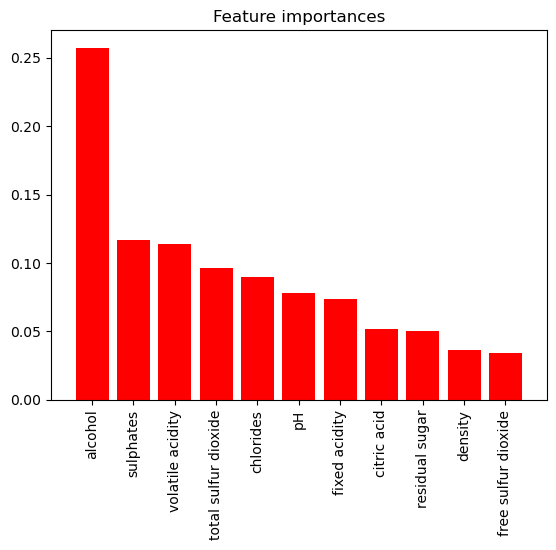

Accuracy of Decision Tree on winequality-white: 0.7170068027210884
Cross-validation scores: [0.5622449  0.56836735 0.59693878 0.63636364 0.63329928]
Average cross-validation score: 0.5994427883512955


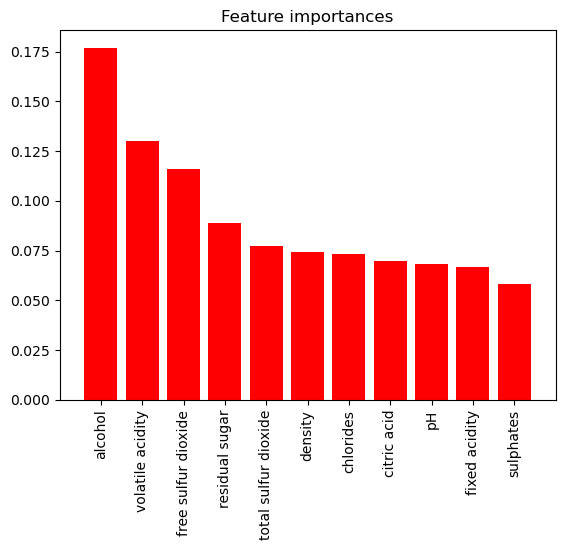

In [43]:
import DataHandler as dh
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import graphviz
from sklearn import tree
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

datasets = dh.read_data("data/full")

for dataset_name, df in datasets.items():
    X = df.iloc[:, :-1]
    
    y = df.iloc[:, -1]
    bins = [0, 5, 7, 10]
    labels = [1, 2, 3]
    y = pd.cut(y, bins=bins, labels=labels)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    clf = DecisionTreeClassifier(random_state=42)

    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)

    print(f"Accuracy of Decision Tree on {dataset_name}: {accuracy}")

    scores = cross_val_score(clf, X, y, cv=5)
    print(f"Cross-validation scores: {scores}")
    print(f"Average cross-validation score: {scores.mean()}")

    importances = clf.feature_importances_
    indices = np.argsort(importances)[::-1]

    plt.figure()
    plt.title("Feature importances")
    plt.bar(range(X.shape[1]), importances[indices], color="r", align="center")
    plt.xticks(range(X.shape[1]), X.columns[indices], rotation='vertical')
    plt.xlim([-1, X.shape[1]])
    plt.show()

    class_names = [str(i) for i in sorted(y.unique())]
    dot_data = tree.export_graphviz(clf, out_file=None, feature_names=X.columns, class_names=class_names, filled=True, rounded=True)
    graph = graphviz.Source(dot_data)
    graph

The accuracy is high. The classifier is really good at predicting the quality of the wine. 

We can also see that importance of the features in the model. The most important feature is alcohol, followed by sulphates and volatile acidity for Red Wine. The least important feature is free sulfur dioxide.

In the case of White Wine, the most important feature is alcohol, followed by Volatile acidity and Free sulfur dioxide. The least important feature is sulphates.

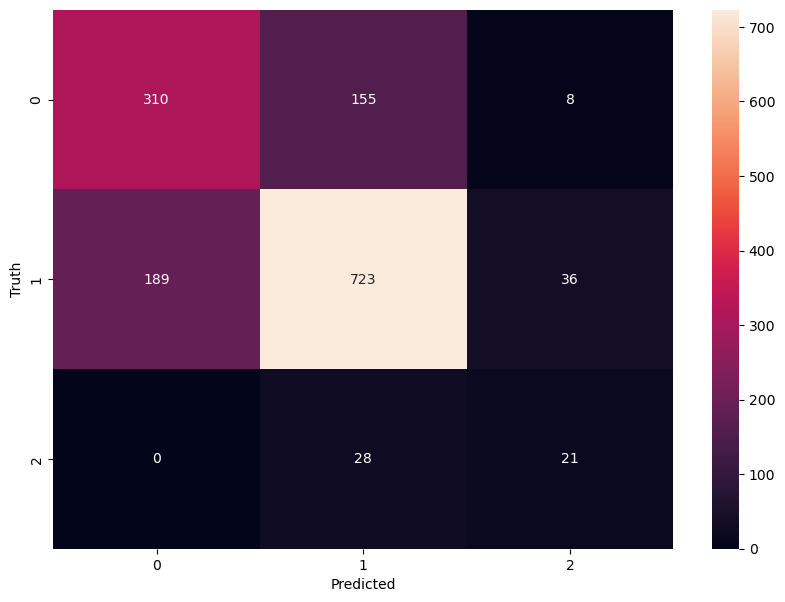

In [44]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

The confusion matrix shows that the classifier classified most of the wine correctly. However we clearly can se here (as well as in visualization of the data) that the biggest group is the for quality from 5 to 7. The same groups is also the biggest in terms of quantity in the datasets.  